In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
path_cut_data = "/home/halli/ux/BMDLab/matlab/resprog/GUI/CleanCutsDL/"
file_cut_data = "cutDataCinCTTI_rev_v2.mat"  # Name of the mat-file, containing the data

mat_cut_data = scipy.io.loadmat(
    path_cut_data + file_cut_data,
    simplify_cells=True,
)["data"]

df = pd.DataFrame(mat_cut_data)
df.head()

,reg_name,patID,t_int,o_label,c_label,s_ecg,s_imp,s_icc,nQRS
0,S_1,1,"[28.035611363636367, 32.03561136363636]",4,4,"[-0.287649, -0.264967, -0.242285, -0.219603, -...","[-0.01228104023227344, -0.012290911848408055, ...","[0.0, -0.0007853573903310096, -0.0015192374520...","[15, 445, 698, 786, 953]"
1,S_1,1,"[49.498, 53.498]",1,1,"[-0.079387, -0.078356, -0.07217, -0.075263, -0...","[0.177948448573244, 0.1771996217803253, 0.1766...","[0.0, -0.0007839844933060789, -0.0015125617588...","[469, 710, 782]"
2,S_1,1,"[98.43039772727272, 102.43039772727272]",1,1,"[-0.040209, -0.040209, -0.038147, -0.039178, -...","[-0.11798159016906515, -0.11641755814308559, -...","[0.0, -0.0007808239060966629, -0.0014972495920...","[38, 188, 449, 708, 855]"
3,S_1,1,"[110.61789772727273, 114.61789772727273]",1,1,"[0.021651, 0.018558, 0.017527, 0.014434, 0.017...","[-0.1465768910808414, -0.13687002075303148, -0...","[-0.01228104023227344, -0.012290911848408055, ...",520
4,S_1,1,"[126.394, 130.394]",1,1,"[-0.090728, -0.089697, -0.090728, -0.089697, -...","[0.1262157219979091, 0.12036175420627249, 0.11...","[0.0, -0.0007828659692674213, -0.0015071338731...","[185, 378, 642, 736]"


Vizualise the original and the consensus rythm labels.

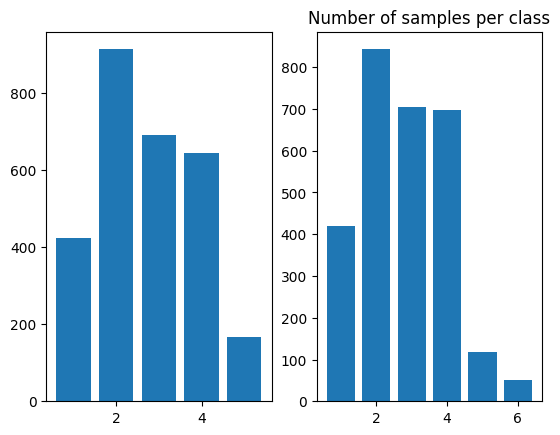

In [4]:
f, ax = plt.subplots(1, 2)
c_label_count = df['c_label'].value_counts()
ax[0].bar(c_label_count.index, c_label_count.values)
o_label_count = df['o_label'].value_counts()
ax[1].bar(o_label_count.index, o_label_count.values)
plt.title("Number of samples per class")
plt.show()

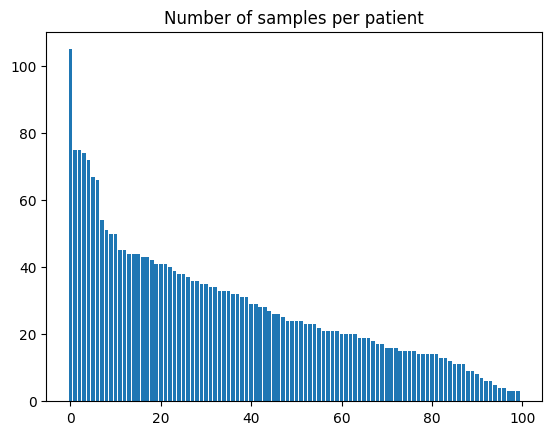

In [5]:
num_classes = df['patID'].nunique()
plt.bar(range(num_classes), df['patID'].value_counts())
plt.title("Number of samples per patient")
plt.show()


Plot a number of random samples to vizualise difference between some of them.

In [6]:
def plot_samples(data: str):
    f, ax = plt.subplots(3, 3)
    idx = 11
    for i in range(3):
        for j in range(3):
            ax[i, j].plot(df.loc[idx, data])
            idx += 11

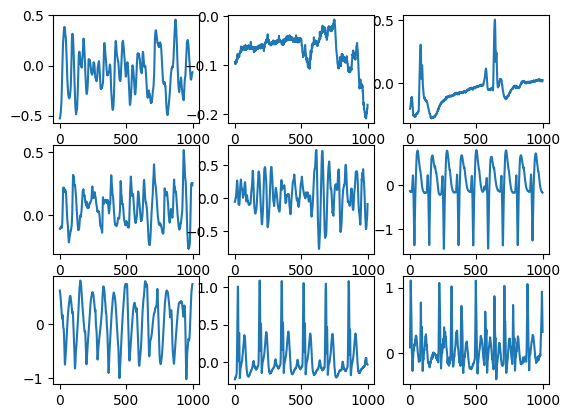

In [7]:
plot_samples('s_ecg')

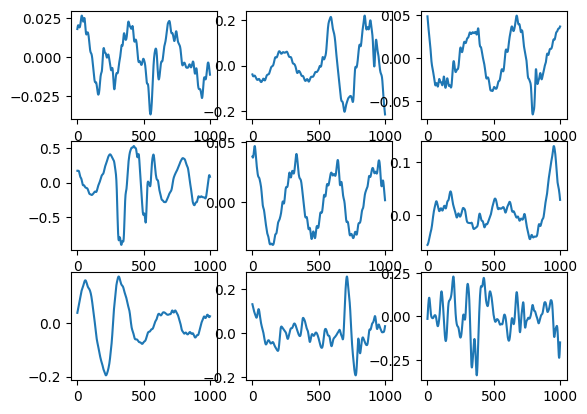

In [8]:
plot_samples('s_imp')

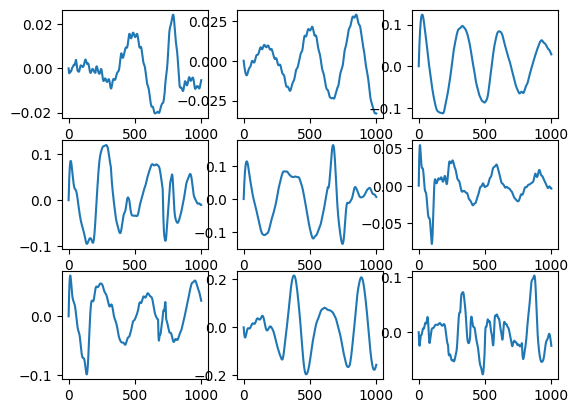

In [9]:
plot_samples('s_icc')

In [10]:
classes, class_count = np.unique(df["c_label"], return_counts=True)
print(
    f"Number of occurences of each consensus class: {dict(zip(classes,class_count))}"
)


Number of occurences of each consensus class: {1: 423, 2: 912, 3: 689, 4: 643, 5: 166}


Because of imbalances in the classes we should change the weights per class.
Trying with a Naive method.

In [11]:
# Calculate weights using inverse proportion.
total = len(df['c_label'])
class_counts = df['c_label'].value_counts().sort_index().values
class_weights = dict()
for k, v in enumerate(class_counts):
    class_weights[k] = 1 - (v / total)
class_weights

{0: 0.8506883162725026,
 1: 0.6780797740910696,
 2: 0.7567949170490647,
 3: 0.7730321214260502,
 4: 0.9414048711613131}